# PROBLEM STATEMENT
## Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 


<table>
    <tbody>
        <tr>
            <th>Variable</th>
            <th>Description</th>
        </tr>
        <tr>
            <td>Item_Identifier</td>
            <td>Unique product ID</td>
        </tr>
        <tr>
            <td>Item_Weight</td>
            <td>Weight of product</td>
        </tr>
        <tr>
            <td>Item_Fat_Content</td>
            <td>Whether the product is low fat or not</td>
        </tr>
        <tr>
            <td>Item_Visibility</td>
            <td>The % of total display area of all products in a store allocated to the particular product</td>
        </tr>
        <tr>
            <td >Item_Type</td>
            <td>The category to which the product belongs</td>
        </tr>
        <tr>
            <td>Item_MRP</td>
            <td>Maximum Retail Price (list price) of the product</td>
        </tr>
        <tr>
            <td>Outlet_Identifier</td>
            <td>Unique store ID</td>
        </tr>
        <tr>
            <td>Outlet_Establishment_Year</td>
            <td>The year in which store was established</td>
        </tr>
        <tr>
            <td>Outlet_Size</td>
            <td>The size of the store in terms of ground area covered</td>
        </tr>
        <tr>
            <td>Outlet_Location_Type</td>
            <td>The type of city in which the store is located</td>
        </tr>
        <tr>
            <td>Outlet_Type</td>
            <td>Whether the outlet is just a grocery store or some sort of supermarket</td>
        </tr>
        <tr>
            <td>Item_Outlet_Sales</td>
            <td>Sales of the product in the particular store. This is the outcome variable to be predicted.</td>
        </tr>
    </tbody>
</table>

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
# Checking for any duplicate data
sum(data.duplicated())

0

In [6]:
print(f"There are total {data['Item_Identifier'].unique().shape[0]} unique products available.")
print(f"There are total {data['Outlet_Identifier'].unique().shape[0]} product outlets.")

There are total 1559 unique products available.
There are total 10 product outlets.


In [7]:
data.drop(columns = ['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace = True)

In [8]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [10]:
continuous_variables = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
categorical_variables = [i for i in data.columns if i not in continuous_variables]
print(continuous_variables)
print(categorical_variables)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [11]:
data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
data.fillna(value = np.nan, axis = 0, inplace = True)

In [13]:
for i in categorical_variables:
    print(data[i].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[1999 2009 1998 1987 1985 2002 2007 1997 2004]
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


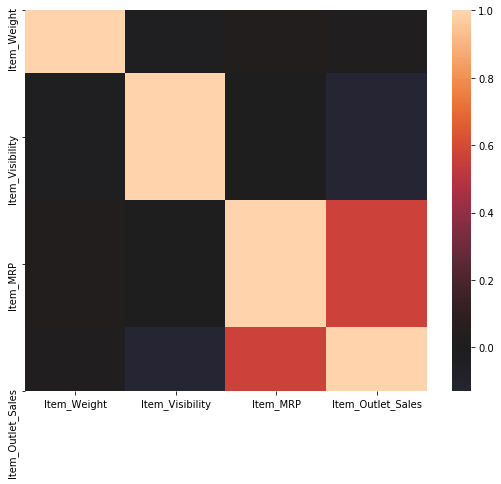

In [14]:
plt.figure(figsize = (9,7))
sns.heatmap(data[continuous_variables].corr(), center = 0)
plt.show()

In [15]:
data[continuous_variables].corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000


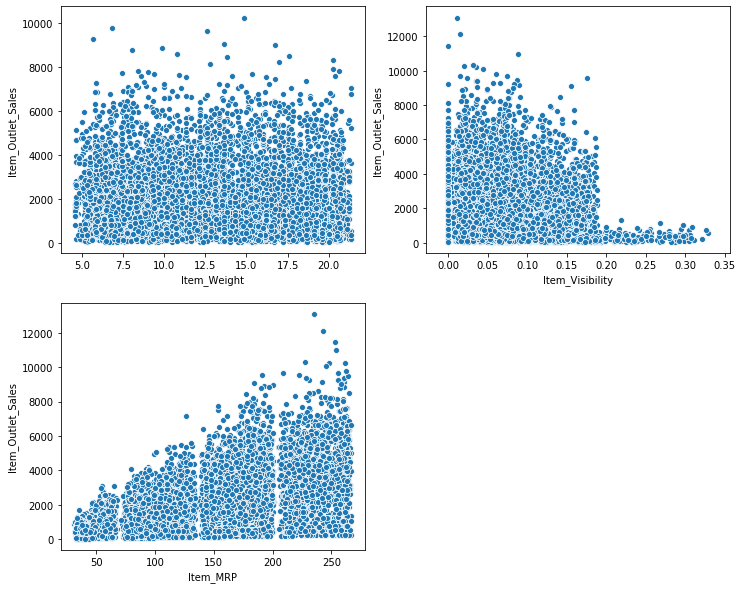

In [16]:
plt.figure(figsize = (12,10))
for i in range(len(continuous_variables[:-1])):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data[continuous_variables[i]], data[continuous_variables[-1]])
plt.show()

**OBSERVATION:** We can observe that there is no linear or non linear relation between the target variable and Itam_weight, Item_Visibility variable.<br>
Let us drop those columns from the data.

In [17]:
data.drop(columns = continuous_variables[:2], inplace = True, axis = 1)

In [18]:
data.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,Low Fat,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


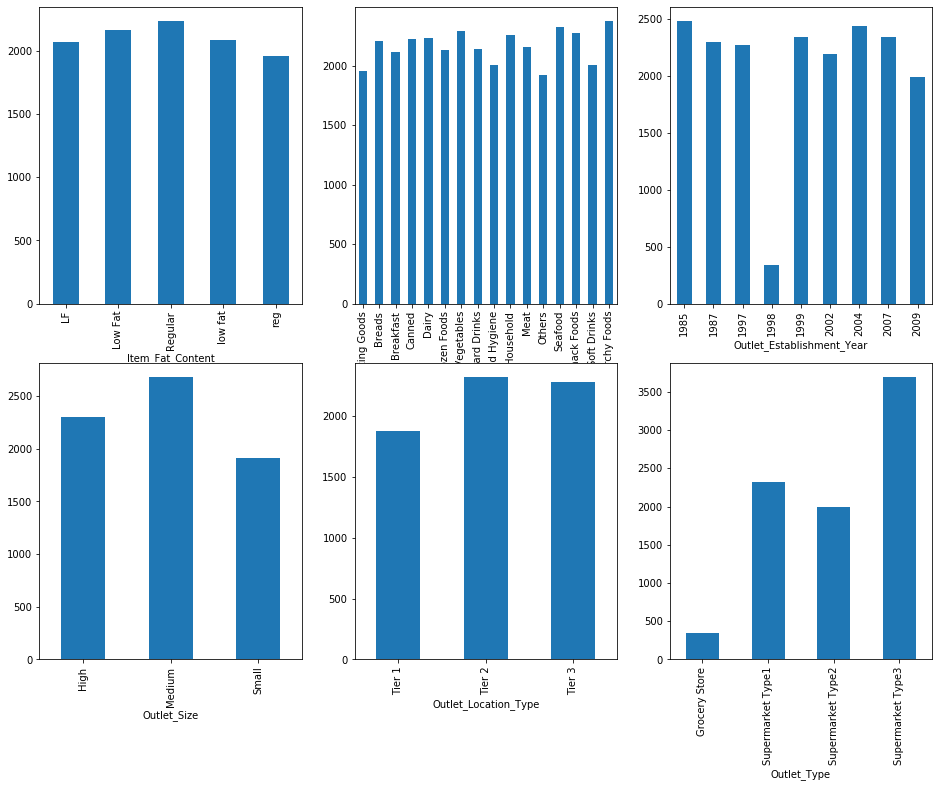

In [19]:
plt.figure(figsize = (16,12))
for i in range(len(categorical_variables)):
    plt.subplot(2,3, i+1)
    data.groupby(categorical_variables[i])['Item_Outlet_Sales'].agg('mean').plot(kind = 'bar')
plt.show()

**OBSERVATION:** The Item fat content variable has only two categories, but the Low Fat category is represented by three seperate values and same goes for Regular. Let us change them into their original form.

In [20]:
def ifc(x):
    if x in ['LF', 'Low Fat', 'low fat']:
        return 'Low_Fat'
    elif x in ['Regular', 'reg']:
        return 'Regular'
data['Item_Fat_Content'] = data['Item_Fat_Content'].apply(ifc)

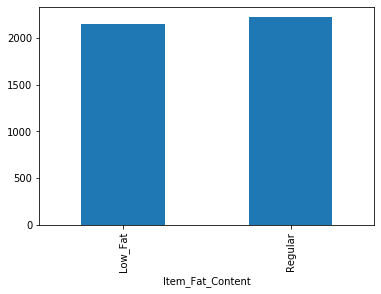

In [21]:
data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].agg('mean').plot(kind = 'bar')

In [22]:
ordinal_variables = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
nominal_variables = [i for i in categorical_variables if i not in ordinal_variables]
print("Ordinal Variables: ", ordinal_variables)
print("Nominal Variables: ", nominal_variables)

Ordinal Variables:  ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
Nominal Variables:  ['Item_Type', 'Outlet_Establishment_Year', 'Outlet_Type']


In [23]:
data[categorical_variables].isnull().sum()

Item_Fat_Content                0
Item_Type                       0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [24]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Outlet_Size'] = imp_mode.fit_transform(data['Outlet_Size'].values.reshape(-1,1))

In [25]:
data[categorical_variables].isnull().sum()

Item_Fat_Content             0
Item_Type                    0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [27]:
for i in ordinal_variables:
    data[i] = label_encoder.fit_transform(data[i])

In [28]:
for i in ordinal_variables:
    print(f"Unique values in {i}: {data[i].unique()}")

Unique values in Item_Fat_Content: [0 1]
Unique values in Outlet_Size: [1 0 2]
Unique values in Outlet_Location_Type: [0 2 1]


In [29]:
df = pd.get_dummies(data, columns = [nominal_variables[0]]+[nominal_variables[2]], drop_first = True)
df.head()

,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,249.8092,1999,1,0,3735.1380,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,48.2692,2009,1,2,443.4228,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,141.6180,1999,1,0,2097.2700,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,182.0950,1998,1,2,732.3800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,53.8614,1987,0,2,994.7052,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [30]:
print(df.isnull().sum())
print(df.info())
df.describe()

Item_Fat_Content                   0
Item_MRP                           0
Outlet_Establishment_Year          0
Outlet_Size                        0
Outlet_Location_Type               0
Item_Outlet_Sales                  0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Type_Supermarket Type1      0
Outlet_Type_Supermarket Type2      0
Outlet_Type_Supermarket Type3      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 24 co

,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.352693,140.992782,1997.831867,1.170832,1.112871,2181.288914,0.029450,0.012906,0.076147,0.080019,...,0.106770,0.049865,0.019829,0.007509,0.140795,0.052212,0.017365,0.654347,0.108882,0.109703
std,0.477836,62.275067,8.371760,0.600327,0.812757,1706.499616,0.169073,0.112877,0.265249,0.271338,...,0.308839,0.217679,0.139420,0.086334,0.347831,0.222467,0.130634,0.475609,0.311509,0.312538
min,0.000000,31.290000,1985.000000,0.000000,0.000000,33.290000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,93.826500,1987.000000,1.000000,0.000000,834.247400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,143.012800,1999.000000,1.000000,1.000000,1794.331000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,185.643700,2004.000000,2.000000,2.000000,3101.296400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,266.888400,2009.000000,2.000000,2.000000,13086.964800,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Item_MRP'] = scaler.fit_transform(df['Item_MRP'].values.reshape(-1,1))
df['Item_MRP']

0       1.747454
1      -1.489023
2       0.010040
3       0.660050
4      -1.399220
          ...   
8518    1.180783
8519   -0.527301
8520   -0.897208
8521   -0.607977
8522   -1.052261
Name: Item_MRP, Length: 8523, dtype: float64

In [32]:
df.head()

,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1.747454,1999,1,0,3735.1380,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,-1.489023,2009,1,2,443.4228,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0.010040,1999,1,0,2097.2700,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0.660050,1998,1,2,732.3800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,-1.399220,1987,0,2,994.7052,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [33]:
X = df.drop('Item_Outlet_Sales', axis = 1)
y = df['Item_Outlet_Sales']

In [34]:
X.shape, y.shape

((8523, 23), (8523,))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 24)

In [36]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6818, 23), (6818,), (1705, 23), (1705,))

### Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
pred = dt_regressor.predict(X_test)
pred

array([1989.4104, 1733.7432, 1736.4064, ..., 2961.4784, 1374.2112,
       1596.5884])

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
print("RMSE of Decision Tree Regressor without Hyperparameter Optimization: ", np.sqrt(mean_squared_error(y_test, pred)))

RMSE of Decision Tree Regressor without Hyperparameter Optimization:  1583.05992292931


In [42]:
from scipy.stats import randint
dt_params = {
    "splitter":['best', 'random'],
    "max_depth": [3,5,7,9,11,13,None],
    "max_features":randint(1,23),
    "min_samples_leaf":randint(1,23)
}

In [43]:
dt_regressor = DecisionTreeRegressor(criterion = 'mse')

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
search_regressor = RandomizedSearchCV(dt_regressor, 
                                 param_distributions = dt_params, 
                                 n_jobs=-1, 
                                 n_iter = 100, 
                                 cv = 5, 
                                 scoring = 'neg_root_mean_squared_error')

In [46]:
search_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7, 9, 11, 13, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000153A2E0B6C8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000153A2DD5F08>,
                                        'splitter': ['best', 'random']},
                   scoring='neg_root_mean_squared_error')

In [47]:
print(search_regressor.best_params_)
print(-1*(search_regressor.best_score_))
print(search_regressor.best_estimator_)

{'max_depth': 9, 'max_features': 17, 'min_samples_leaf': 19, 'splitter': 'random'}
1099.4316290299005
DecisionTreeRegressor(max_depth=9, max_features=17, min_samples_leaf=19,
                      splitter='random')


In [48]:
final_dt_regressor = DecisionTreeRegressor(max_depth=7, max_features=14, min_samples_leaf=20)

In [49]:
final_dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, max_features=14, min_samples_leaf=20)

In [50]:
pred = final_dt_regressor.predict(X_test)
print("RMSE of Decision Tree Regressor with Hyperparameter Optimization: ", np.sqrt(mean_squared_error(y_test, pred)))

RMSE of Decision Tree Regressor with Hyperparameter Optimization:  1071.5730747597288


### Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
print(np.sqrt(mean_squared_error(y_test, rf_regressor.predict(X_test))))

1177.1400835745026


In [53]:
rf_params={'max_depth':[3,5,7,10,None],
              'n_estimators':[10,50,100,150,200,250,300,400,500],
              'max_features':randint(1,23),
               'criterion':["mse"],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,23),
              }

In [54]:
search_regressor = RandomizedSearchCV(rf_regressor, 
                                 param_distributions = rf_params, 
                                 n_jobs=-1, 
                                 n_iter = 100, 
                                 cv = 5, 
                                 scoring = 'neg_root_mean_squared_error')

In [55]:
search_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse'],
                                        'max_depth': [3, 5, 7, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000153A2E3BC88>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000153A2C8EB08>,
                                        'n_estimators': [10, 50, 100, 150, 200,
                                                         250, 300, 400, 500]},
                   scoring='neg_root_mean_squared_error')

In [56]:
print(search_regressor.best_params_)
print(-1*(search_regressor.best_score_))
print(search_regressor.best_estimator_)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 7, 'max_features': 18, 'min_samples_leaf': 19, 'n_estimators': 400}
1083.212938991747
RandomForestRegressor(max_depth=7, max_features=18, min_samples_leaf=19,
                      n_estimators=400)


In [114]:
final_rf_regressor = RandomForestRegressor(max_depth=7, max_features=18, min_samples_leaf=19,
                      n_estimators=400)

In [115]:
final_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=18, min_samples_leaf=19,
                      n_estimators=400)

In [116]:
pred = final_rf_regressor.predict(X_test)
print("RMSE of Random Forest Regressor with Hyperparameter Optimization: ", np.sqrt(mean_squared_error(y_test, pred)))

RMSE of Random Forest Regressor with Hyperparameter Optimization:  1057.5595401605692


### XGB Regressor

In [60]:
from xgboost import XGBRegressor

In [61]:
xgb_params = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [62]:
xgb_regressor = XGBRegressor(verbose = 3)

In [63]:
search_regressor=RandomizedSearchCV(xgb_regressor,param_distributions=xgb_params,n_iter=5,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [64]:
search_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    3.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.9s finished


[16:58:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [65]:
print(search_regressor.best_params_)
print(-1*(search_regressor.best_score_))
print(search_regressor.best_estimator_)

{'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.4}
1103.3181524345987
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbose=3,
             verbosity=None)


In [66]:
final_xgb_regressor = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbose=3,
             verbosity=None)

In [67]:
final_xgb_regressor.fit(X_train, y_train)

[16:58:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbose=3,
             verbosity=None)

In [68]:
pred = final_xgb_regressor.predict(X_test)
print("RMSE of XGB Regressor with Hyperparameter Optimization: ", np.sqrt(mean_squared_error(y_test, pred)))

RMSE of XGB Regressor with Hyperparameter Optimization:  1079.770225117287


### AdaBoost Regressor using XGBRegressor as base estimator

In [69]:
from sklearn.ensemble import AdaBoostRegressor

In [70]:
ada_params = {
    'n_estimators': [50,100,150,200,300],
    "learning_rate": [0.05,0.1,0.5,1,1.25,1.5],
}

In [71]:
ada_regressor = AdaBoostRegressor(
    base_estimator = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1,
             verbosity=None)
)

In [72]:
search_regressor=RandomizedSearchCV(ada_regressor,param_distributions=ada_params,n_iter=5,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [73]:
search_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   55.1s remaining:   17.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5,
                                                                           booster='gbtree',
                                                                           colsample_bylevel=1,
                                                                           colsample_bynode=1,
                                                                           colsample_bytree=0.5,
                                                                           gamma=0.4,
                                                                           gpu_id=-1,
                                                                           importance_type='gain',
                                                                           interaction_constraints='',
                                                                           learning_rate=0.15,
                                  

In [74]:
print(search_regressor.best_params_)
print(-1*(search_regressor.best_score_))
print(search_regressor.best_estimator_)

{'n_estimators': 200, 'learning_rate': 0.05}
1121.6473699704
AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.5, gamma=0.4,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.15,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=100, n_jobs=0,
                                              num_parallel_tree=1,
                                              random_sta

In [75]:
final_ada_regressor = AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.5, gamma=0.4,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.15,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=1, missing=np.nan,
                                              monotone_constraints='()',
                                              n_estimators=100, n_jobs=0,
                                              num_parallel_tree=1,
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              subsample=1, tree_method='exact',
                                              validate_parameters=1,
                                              verbosity=None),
                  learning_rate=0.05)

In [76]:
final_ada_regressor.fit(X_train, y_train)
pred = final_ada_regressor.predict(X_test)
print("RMSE of ADA Regressor with Hyperparameter Optimization: ", np.sqrt(mean_squared_error(y_test, pred)))

RMSE of ADA Regressor with Hyperparameter Optimization:  1083.7587634587655


### AdaBoost Regressor using Random Forest Regressor as base estimator

In [122]:
ada_regressor = AdaBoostRegressor(base_estimator = RandomForestRegressor(max_depth=7, max_features=18, min_samples_leaf=19,
                      n_estimators=400))

In [120]:
search_regressor=RandomizedSearchCV(ada_regressor,param_distributions=ada_params,n_iter=10,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [121]:
search_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 28.8min finished


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=7,
                                                                                    max_features=18,
                                                                                    min_samples_leaf=19,
                                                                                    n_estimators=400)),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.5, 1,
                                                          1.25, 1.5],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300]},
                   scoring='neg_root_mean_squared_error', verbose=3)

In [123]:
print(search_regressor.best_params_)
print(-1*(search_regressor.best_score_))
print(search_regressor.best_estimator_)

{'n_estimators': 50, 'learning_rate': 0.05}
1087.351957550315
AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=7,
                                                       max_features=18,
                                                       min_samples_leaf=19,
                                                       n_estimators=400),
                  learning_rate=0.05)


In [124]:
final_ada_regressor = AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=7,
                                                       max_features=18,
                                                       min_samples_leaf=19,
                                                       n_estimators=400),
                  learning_rate=0.05)
final_ada_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=7,
                                                       max_features=18,
                                                       min_samples_leaf=19,
                                                       n_estimators=400),
                  learning_rate=0.05)

In [125]:
pred = final_ada_regressor.predict(X_test)
print("RMSE of ADA Regressor with Hyperparameter Optimization: ", np.sqrt(mean_squared_error(y_test, pred)))

RMSE of ADA Regressor with Hyperparameter Optimization:  1063.623565191361


## Submission Data

In [126]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [127]:
test_X = test_data.drop(columns = ['Item_Identifier', 'Outlet_Identifier','Item_Weight', 'Item_Visibility'], axis = 1)
test_X.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,reg,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,Low Fat,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,Low Fat,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,Regular,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [128]:
def ifc(x):
    if x in ['LF', 'Low Fat', 'low fat']:
        return 'Low_Fat'
    elif x in ['Regular', 'reg']:
        return 'Regular'
test_X['Item_Fat_Content'] = test_X['Item_Fat_Content'].apply(ifc)

In [129]:
test_X.isnull().sum()

Item_Fat_Content                0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [130]:
test_X['Outlet_Size'] = imp_mode.fit_transform(test_X['Outlet_Size'].values.reshape(-1,1))

In [131]:
test_X.isnull().sum()

Item_Fat_Content             0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [132]:
for i in ordinal_variables:
    test_X[i] = label_encoder.fit_transform(test_X[i])

In [133]:
for i in ordinal_variables:
    print(test_X[i].unique())

[0 1]
[1 2 0]
[0 1 2]


In [134]:
test_X = pd.get_dummies(test_X, columns = [nominal_variables[0]]+[nominal_variables[2]], drop_first = True)
test_X.head()

,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,107.8622,1999,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,87.3198,2007,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,241.7538,1998,1,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,155.0340,2007,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,234.2300,1985,1,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [135]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_X['Item_MRP'] = scaler.fit_transform(test_X['Item_MRP'].values.reshape((-1,1)))
test_X['Item_MRP']

0       0.323413
1       0.235849
2       0.894140
3       0.524488
4       0.862069
          ...   
5676    0.466011
5677    0.584637
5678    0.369798
5679    0.778487
5680    0.203778
Name: Item_MRP, Length: 5681, dtype: float64

In [136]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 23 columns):
Item_Fat_Content                   5681 non-null int32
Item_MRP                           5681 non-null float64
Outlet_Establishment_Year          5681 non-null int64
Outlet_Size                        5681 non-null int32
Outlet_Location_Type               5681 non-null int32
Item_Type_Breads                   5681 non-null uint8
Item_Type_Breakfast                5681 non-null uint8
Item_Type_Canned                   5681 non-null uint8
Item_Type_Dairy                    5681 non-null uint8
Item_Type_Frozen Foods             5681 non-null uint8
Item_Type_Fruits and Vegetables    5681 non-null uint8
Item_Type_Hard Drinks              5681 non-null uint8
Item_Type_Health and Hygiene       5681 non-null uint8
Item_Type_Household                5681 non-null uint8
Item_Type_Meat                     5681 non-null uint8
Item_Type_Others                   5681 non-null uint8
Item_Type_S

In [137]:
X.columns == test_X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [138]:
final_ada_regressor = AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=7,
                                                       max_features=18,
                                                       min_samples_leaf=19,
                                                       n_estimators=400),
                  learning_rate=0.05)
final_ada_regressor.fit(X, y)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=7,
                                                       max_features=18,
                                                       min_samples_leaf=19,
                                                       n_estimators=400),
                  learning_rate=0.05)

In [139]:
test_pred = final_ada_regressor.predict(test_X)
test_pred

array([2721.88379609, 2492.64644762,  504.65210646, ..., 2695.45962539,
       3285.7630578 , 2542.12039139])

In [140]:
submission = pd.DataFrame({
    'Item_Identifier':test_data['Item_Identifier'],
    'Outlet_Identifier':test_data['Outlet_Identifier'],
    'Item_Outlet_Sales':test_pred
})

In [141]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2721.883796
1,FDW14,OUT017,2492.646448
2,NCN55,OUT010,504.652106
3,FDQ58,OUT017,3018.747469
4,FDY38,OUT027,5390.866633
...,...,...,...
5676,FDB58,OUT046,2878.705108
5677,FDD47,OUT018,2832.394888
5678,NCO17,OUT045,2695.459625
5679,FDJ26,OUT017,3285.763058


In [142]:
submission.to_csv('submission.csv', index = None)

In [143]:
sum(submission['Item_Outlet_Sales'] < 0)

0